# UM4MA379, Statistique Computationnelle, 2025-2026

Sorbonne Université, Master 1

Cours :  A. Guyader<br>
TP : M. Sangnier

## TP 1 : Simulation Monte-Carlo

# Table of contents
1. [Exercice 1 : Lien géométrique/exponentielle](#part1)
1. [Exercice 2 : Nul n'est censé ignorer la loi normale ](#part2)
1. [Exercice 3: Monte-Carlo standard versus échantillonnage préférentiel ](#part3)
1. [Exercice 4 : Here comes trouble](#part4)


In [2]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots

# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

# Exercice 1 : Lien géométrique/exponentielle <a id="part1"></a>
>Soient $0<p<1$ et $X \sim \text{Geo}_{\mathbb N^*}(p)$.
>
>**Question 1.** Soit $p=1/3$. Grâce à la classe `geom` du module `stats`, générer un échantillon de grande taille $n$ et chronométrer la durée d'exécution (on pourra utiliser la fonction `perf_counter` du module `time`).

In [53]:
from time import perf_counter
p = 1/3
n=100000000

start = perf_counter()
X1 = stats.geom.rvs(p, size=n)
end = perf_counter()
print(f"Échantillon généré:{X1[:10]}") 
print(f"Durée de la génération: {end-start}")

Échantillon généré:[1 3 8 1 3 3 1 2 4 1]
Durée de la génération: 3.5851668000032078


>**Question 2.** Soit $(B_k)_{k\geq 1}$ une suite de variables i.i.d. selon une loi de Bernoulli $\text{Ber}(p)$. Comment obtenir une variable $X$ de loi géométrique $\text{Geo}_{\mathbb N^*}(p)$ à partir de celles-ci ? Implémenter cette méthode. Que se passe-t-il lorsque $p$ est proche de 0 ?

**Réponse :**
…

In [33]:
def geometrique(p):
    c = 0
    Pos = 0
    while(not Pos):
        Pos = stats.bernoulli.rvs(p)
        c+=1
    return c

p = [1/2, 1/4, 1/8, 0.001]
for i in p:
    start = perf_counter()
    y = geometrique(i)
    end = perf_counter()
    print(y, end-start)


2 0.0001841000048443675
9 0.0004197000016574748
10 0.0003068000005441718
4713 0.11226330000499729


>**Question 3.** Soit $p=1/3$. Implémenter la méthode précédente pour générer un échantillon de grande taille $n$, chronométrer la durée d'exécution et comparer à la question 1.

**Réponse :**
…

In [38]:
p = 1/3
n = 1000

start = perf_counter()
X2 = []
for i in range(n):
    c = 0
    Pos = 0
    while(not Pos):
        c+=1
        Pos = stats.bernoulli.rvs(p)
    X2.append(c)

end = perf_counter()
print(f"Échantillon à partir de Bernouilli {X2[:10]}")
print(f"Durée de la génération: {end-start}")

Échantillon à partir de Bernouilli [1, 1, 2, 5, 2, 3, 4, 4, 7, 10]
Durée de la génération: 0.08471589999680873


>**Question 4.** Soient $\lambda>0$, $T \sim \text{Exp}(\lambda)$
>et $X=\lceil T\rceil$ la partie entière par excès de $T$ (i.e. $\lceil 0.4\rceil =1$ et $\lceil 2\rceil =2$). Quelles valeurs peut prendre $X$ ? Avec quelles probabilités ? En déduire un moyen de générer une loi géométrique $\text{Geo}_{\mathbb N^*}(p)$. 

**Réponse :**
…

In [ ]:
#x peut prendre les valeurs 1,2,3,4....
#P(X = n) = P(n-1 < T <= n) = exp(-(n-1)*lamba) - exp(-n*lambda) = exp(-lambda * n)(1-exp(lambda))
#on a que pour lambda = -ln(1-p), X suit une loi Geom(p). Donc on simule une exponentielle de parametre -ln(1-p) et on prend la partie entiere,
#en obtenant des simulations des geometriques de parametre p

>**Question 5.** Soit $p=1/3$. Implémenter la méthode précédente pour générer un échantillon de grande taille $n$, chronométrer la durée d'exécution et comparer à la question 1. Que constatez-vous ?

**Réponse :**
…

In [54]:
p = 1/3
l = -np.log(1-p)
n = 100000000
start = perf_counter()
#on simule une exponentielle en prenant des uniformes et en faisant la transformation -ln(U)/lambda
S = stats.uniform.rvs(0,1,size=n)
G = np.ceil(-np.log(S)/l).astype(int)
end = perf_counter()
print(f"Échantillonage avec utilisation d'exponentielles: {G[:10]}")
print(f"Durée de la génération: {end-start}")

Échantillonage avec utilisation d'exponentielles: [ 2  4  4  5  4  7 12  3  5  2]
Durée de la génération: 3.196570200001588


>**Question 6.** Que donne la méthode d'inversion ?

**Réponse :**
…

# Exercice 2 : Nul n'est censé ignorer la loi normale  <a id="part2"></a>


>**Question 1.**
Soit $(U,V)$ un couple de variables i.i.d. de loi uniforme sur $[0,1]$. Montrer que les variables $X$ et $Y$ définies par
$$\left\{ \begin{array}{l}
           X=\sqrt{-2\log U}\times\cos(2\pi V)\\
           Y=\sqrt{-2\log U}\times\sin(2\pi V)\\
          \end {array}\right .$$
sont i.i.d. gaussiennes centrées réduites.

**Réponse :**
…

In [58]:
#On peut trouver que U = e^(-x^2-y^2) et V = arctan(y/x)/2pi. alors, si on utilise le th de changement
#de variables, on a que f_(X,Y) = f_(U,V)(u(x,y), v(x,y)) * J où J est le jacobien du changement, donné
#par |du/dx * dv/dy - du/dy*dv/dx| = e^(-x^2-y^2)/2 / 2pi, et comme f_(U,V)(u(x,y), v(x,y)) donne des
#des indicatrices pour x entre -inf,inf et y entre -inf,inf, on conclut que X,Y sont iid gaussiennes
#centrées réduites

 >**Question 2.** Algorithme de Box-Muller : estimer le temps nécessaire pour simuler $n=10^7$  gaussiennes avec la méthode de la question précédente. Le comparer à celui mis par la fonction `norm` du module `stats`.

**Réponse :**
…

In [70]:
n = int(1e7)

start = perf_counter()
U = stats.uniform.rvs(0,1,size=n)
V = stats.uniform.rvs(0,1,size=n)

X = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
Y = np.sqrt(-2*np.log(U))*np.sin(2*np.pi*V)
XY = np.column_stack((X,Y))
end = perf_counter()
print(f"Échantillonage avec Box-Muller de couples de gaussiennes centrées reduites: {XY[:10]}")
print(f"Durée de la génération: {end-start}")

start = perf_counter()
Xs = stats.norm.rvs(size=n)
Ys = stats.norm.rvs(size=n)
XYs = np.column_stack((Xs, Ys))
end = perf_counter()
print(f"Échantillonage avec scipy.stats de couples de gaussiennes centrées reduites: {XYs[:10]}")
print(f"Durée de la génération: {end-start}")



Échantillonage avec Box-Muller de couples de gaussiennes centrées reduites: [[-0.20092338  0.68212138]
 [-0.20197262  0.75755754]
 [ 1.33427981  0.18555925]
 [-0.02981987 -1.05913928]
 [-0.93741627  0.91876164]
 [ 0.28652468  0.42748407]
 [ 1.23393142  0.31823608]
 [ 0.81907784 -0.08909429]
 [-1.35226782  0.91087021]
 [ 0.12634608 -0.59332449]]
Durée de la génération: 1.0700203999876976
Échantillonage avec scipy.stats de couples de gaussiennes centrées reduites: [[ 3.23496836e-01 -2.69243227e-04]
 [ 1.65267235e+00 -1.39338295e+00]
 [ 6.22304303e-01  9.25684226e-01]
 [ 1.67030347e+00  1.75450701e+00]
 [ 2.81092380e-01  1.82845027e-01]
 [-1.17295016e+00 -1.94407805e-01]
 [-8.95333118e-01 -7.56643624e-01]
 [ 1.08798751e+00  1.39170517e+00]
 [ 1.90821163e+00 -1.30526039e-01]
 [ 5.97490959e-01 -4.73387787e-01]]
Durée de la génération: 0.5078291999961948


>**Question 3.**
Déterminer la loi du couple de variables aléatoires $(W, Z) = \left( \sqrt{U} \cos(2 \pi V), \sqrt{U} \sin(2 \pi V) \right)$.
Comment peut-on simuler cette loi par méthode du rejet ?

**Réponse :**
…

In [ ]:
#avec una transformation similaire, on a que W^2+Z^2 = U et arctan(Z/W)/2pi +pik = V, 
#avec le théorème de changement de variables, on obtient que la loi de f_W,Z est une uniforme
#sur le disque unité

**Réponse :**
…

[-0.07747873 -0.5029902  -0.12151409  0.646918    0.94139168 -0.21559543
  0.16574947 -0.0288983   0.64695632  0.03111056] [ 0.4517911  -0.83365399  0.87681457  0.81134654  0.22805252 -0.75471887
 -0.85290898  0.41465509  0.71945583  0.07709645]


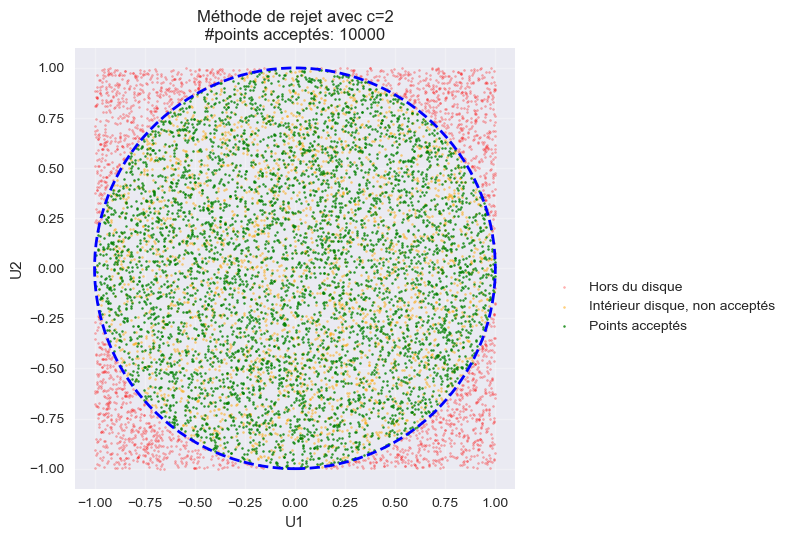

In [ ]:
#Si on prend une uniforme sur [-1,1]^2, et par example c = 2

n = 10000
U1 = stats.uniform.rvs(-1,2, size=n)
U2 = stats.uniform.rvs(-1,2, size=n)

V = stats.uniform.rvs(0,1,size=n)

A = (U1**2 + U2**2 <= 1) & (V<= 2/np.pi)

fig, ax1 = plt.subplots()

C = (U1**2 + U2**2 > 1)
ax1.scatter(U1[C], U2[C], 
           c='red', alpha=0.3, s=2, label='Hors du disque')

B = (U1**2 + U2**2 <= 1) & (V > 2/np.pi)
ax1.scatter(U1[B], U2[B], 
           c='orange', alpha=0.5, s=2, label='Intérieur disque, non acceptés')

ax1.scatter(U1[A], U2[A], 
           c='green', alpha=0.8, s=2, label='Points acceptés')

# Círculo unidad
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2, linestyle='--')
ax1.add_patch(circle)
ax1.set_aspect('equal')
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Méthode de rejet avec c=2\n#points acceptés: {n}')
ax1.set_xlabel('U1')
ax1.set_ylabel('U2')
ax1.legend(bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()




[ 0.32305759  0.96760995 -0.49320248 -0.80934568 -0.4735413  -0.02084257
  0.1219916  -0.55970884  0.5176763   0.05763984] [ 0.82840527  0.01509562 -0.10834075 -0.05346055 -0.04434225  0.35904807
 -0.04574314  0.52302468 -0.09829883  0.2409918 ]


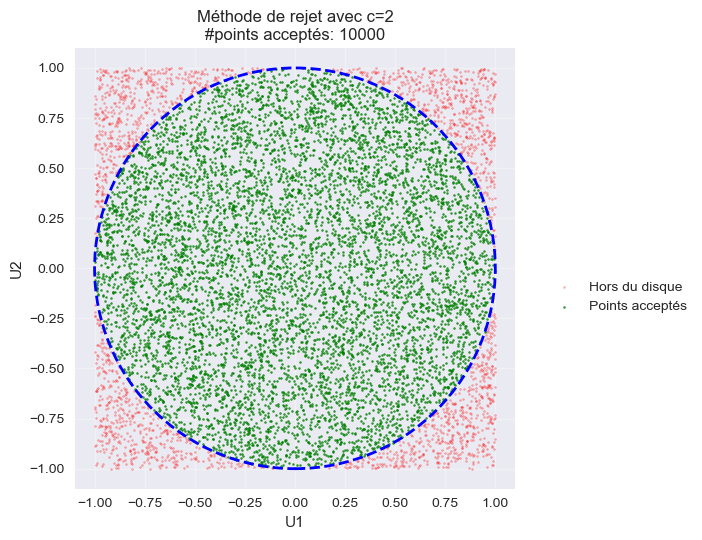

In [ ]:
#en effet si on prend c=4/np.pi, on a que l'ensemble de points jeunes disparait. On aura que r = 1, et V <= 1 ps

n = 10000
U1 = stats.uniform.rvs(-1,2, size=n)
U2 = stats.uniform.rvs(-1,2, size=n)
#U uniforme sur [-1,1]^2

V = stats.uniform.rvs(0,1,size=n)

A = (U1**2 + U2**2 <= 1)

fig, ax1 = plt.subplots()

C = (U1**2 + U2**2 > 1)
ax1.scatter(U1[C], U2[C], 
           c='red', alpha=0.3, s=2, label='Hors du disque')

ax1.scatter(U1[A], U2[A], 
           c='green', alpha=0.8, s=2, label='Points acceptés')

# Círculo unidad
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2, linestyle='--')
ax1.add_patch(circle)
ax1.set_aspect('equal')
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Méthode de rejet avec c=2\n#points acceptés: {n}')
ax1.set_xlabel('U1')
ax1.set_ylabel('U2')
ax1.legend(bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()


>**Question 4.**
Méthode polaire de Marsaglia : déduire de la question précédente une nouvelle méthode de simulation de la loi $\mathcal N(0, 1)$.
Quel est son avantage par rapport à l'algorithme de Box-Muller.
Quel est son défaut ?

**Réponse :**
…

Moyenne et variance de N1: 9.899576562583154e-05, 1.0005390412604946
Moyenne et variance de N2: -0.00030917256336832446, 0.9998844660432298


Text(0, 0.5, 'Densité')

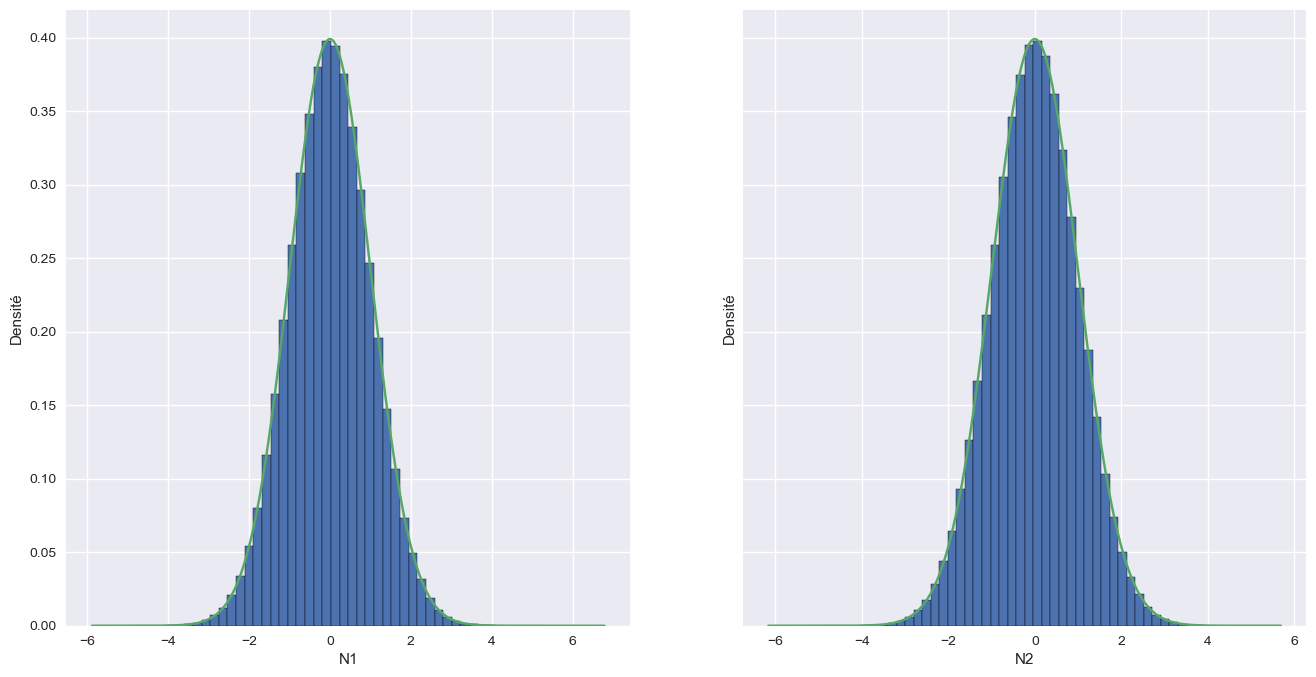

In [52]:
#(W,Z) donne une uniforme sur le disque unité, mais en effet W^2+Z^2 = U, qui suit une uniforme sur [0,1]
#si on prend sqrt(-2log(W^2+Z^2))/(sqrt(W^2+Z^2)) * (W,Z) on aura le vecteur aléatoire de la question 1
#En obtenant une couple de gaussiennes centrées reduites.

n = 1000000
U1 = stats.uniform.rvs(-1,2, size=n)
U2 = stats.uniform.rvs(-1,2, size=n)
#U uniforme sur [-1,1]^2

V = stats.uniform.rvs(0,1,size=n)

D1 = U1[(U1**2 + U2**2 <= 1)]
D2 = U2[(U1**2 + U2**2 <= 1)]
#Sur les couples D1, D2, on applique la transformation

N1 = np.sqrt(-2*np.log(D1**2 +D2**2)/(D1**2 +D2**2)) * D1
N2 = np.sqrt(-2*np.log(D1**2 +D2**2)/(D1**2 +D2**2)) * D2

print(f"Moyenne et variance de N1: {np.mean(N1)}, {np.var(N1)}")
print(f"Moyenne et variance de N2: {np.mean(N2)}, {np.var(N2)}")

fig, ax = plt.subplots(1,2,figsize=(16,8), sharey=True)
ax[0].hist(N1, density=True, bins=50, edgecolor='black')
ax[0].plot(np.linspace(min(N1)-1, max(N1)+1, 10000), stats.norm.pdf(np.linspace(min(N1)-1, max(N1)+1, 10000),0,1))
ax[0].set_xlabel('N1')
ax[0].set_ylabel('Densité')

ax[1].hist(N2, density=True, bins=50, edgecolor='black')
ax[1].plot(np.linspace(min(N2)-1, max(N2)+1, 10000), stats.norm.pdf(np.linspace(min(N2)-1, max(N2)+1, 10000),0,1))
ax[1].set_xlabel('N2')
ax[1].set_ylabel('Densité')




**Question 5.** Simuler et représenter $n=1000$ réalisations d'une loi normale multivariée $\mathcal{N}(m,\Gamma)$ avec

$$
m = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
\quad \text{et} \quad
\Gamma = \begin{bmatrix} 1 & 1 \\ 1 & 4 \end{bmatrix}.
$$

Retrouver approximativement $m$ et $\Gamma$ à partir de cet échantillon.

Moyenne et variance de M: (2.0033985159982537, 0.9813878467412849) ; (1.0066790672262547, 3.8928345351806213


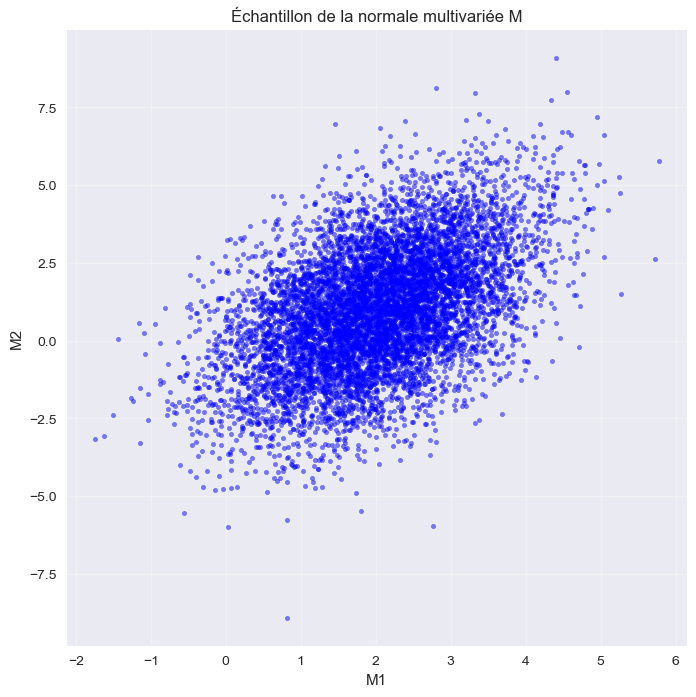

In [102]:
#donné un vecteur gaussien centré reduit, on trouve la normal multivariée comme M = m + L@N 
#avec N notre vecteur centré reduit et L telle que Sigma = L @ L^t qu'on trouve avec Cholesky ou Cholesky generalisé
#en calculant on obtient que L = [[1,0], [1, sqrt(3)]]

n = 10000
U1 = stats.uniform.rvs(-1,2, size=n)
U2 = stats.uniform.rvs(-1,2, size=n)
#U uniforme sur [-1,1]^2

V = stats.uniform.rvs(0,1,size=n)

D1 = U1[(U1**2 + U2**2 <= 1)]
D2 = U2[(U1**2 + U2**2 <= 1)]
#Sur les couples D1, D2, on applique la transformation

N1 = np.sqrt(-2*np.log(D1**2 +D2**2)/(D1**2 +D2**2)) * D1
N2 = np.sqrt(-2*np.log(D1**2 +D2**2)/(D1**2 +D2**2)) * D2

N = np.column_stack((N1,N2)) #on a que N es une normal multivariée centrée avec Sigma = Id_2
M = np.array([2,1]) + (np.array([[1,0],[1,np.sqrt(3)]])@np.transpose(N)).T

#on transpose N pour obtenir 1000 colonnes et 2 files, en obtenant en le produit aussi 2 files et 1000 colonnes, une
#pour chaque simulation, donc on transpose ce résultat final pour sommer la moyenne

print(f"Moyenne et variance de M: ({np.mean(M[:, 0])}, {np.mean(M[:, 1])}) ; ({np.var(M[:,0])}, {np.var(M[:,1])}")
# print(f"Covariance de M: {np.cov(M[:,0], M[:,1])}")

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(M[:,0], M[:,1], c='blue', alpha=0.5, s=10)
ax.set_xlabel('M1')
ax.set_ylabel('M2')
ax.set_title('Échantillon de la normale multivariée M')
plt.grid(True, alpha=0.3)
plt.show()

# Exercice 3: Monte-Carlo standard versus échantillonnage préférentiel  <a id="part3"></a>
>On veut retrouver par simulation la valeur de $p=\mathbb{P}(X\geq 6)$ avec $X\sim{\cal N}(0,1)$.
>
>**Question 1.** Déterminer $p$ grâce à la classe `norm` de `scipy.stats`.

In [166]:
# Answer
norm = stats.norm()

threshold = 6

p = 1 - norm.cdf(threshold)

# Fin compléter

print('p =', p)

p = 9.865877004244794e-10


>**Question 2.** Estimer $p$ via l'estimateur Monte-Carlo standard basé sur la simulation de $n$ variables gaussiennes avec $n$ le plus grand possible.

**Réponse :**
…

In [167]:
# Answer
n = 10**8  # int(1e8)
from numpy.random import default_rng
rng = default_rng()

X = stats.norm.rvs(random_state=rng, size=n)

estMC = 1/n * np.sum(X>=6)

# Fin compléter
print('Estimateur Monte-Carlo standard :', estMC)

Estimateur Monte-Carlo standard : 0.0


>**Question 3.** Si $T \sim \text{Exp}(1)$, donner la densité de l'exponentielle translatée $Y = 6+T$.
>En déduire un estimateur d'échantillonnage préférentiel pour $p$, ainsi qu'un intervalle de confiance asymptotiques à 95% pour $n=500$.

**Réponse :**
…

In [168]:
# Answer
exp = stats.expon(loc=threshold)
level = 0.05
n = 500

#la densité de l'exponentielle translaté Y est e^-(x-6)*1_{x>=6}
#si on fait inversion, on sait simuler cette loi comme X_i = 6 - log(U_i) avec U_i uniforme[0,1]

X = exp.rvs(random_state=rng, size=n)
est = 1/n * np.sum((X>=6).astype(float) * norm.pdf(X)/exp.pdf(X))
ic_bound = norm.ppf(1-level/2)*np.sqrt((np.sum(((X>=6).astype(float) * norm.pdf(X)/exp.pdf(X))**2)/n - est**2)/n)

# Fin compléter

print(f"Estimateur : {est:1.2e}")
print(f"Intervalle de confiance asymptotique : [{est-ic_bound:1.2e},{est+ic_bound:1.2e}]")

Estimateur : 9.54e-10
Intervalle de confiance asymptotique : [8.20e-10,1.09e-09]


>**Question 4.** Tracer l'évolution de l'estimateur et des intervalles de confiance pour $n$ allant par exemple de 1 à 500.

**Remarque :** Le code qui suit donne l'évolution de l'estimateur et des intervalles de confiance. Bien entendu, comme ce sont des intervalles de confiance asymptotiques, ceux-ci n'ont aucun sens lorsque $n$ est petit. Ce phénomène se reflète d'ailleurs sur la figure puisqu'on voit que ces intervalles se stabilisent dès que $n$ devient supérieur à 100 environ.

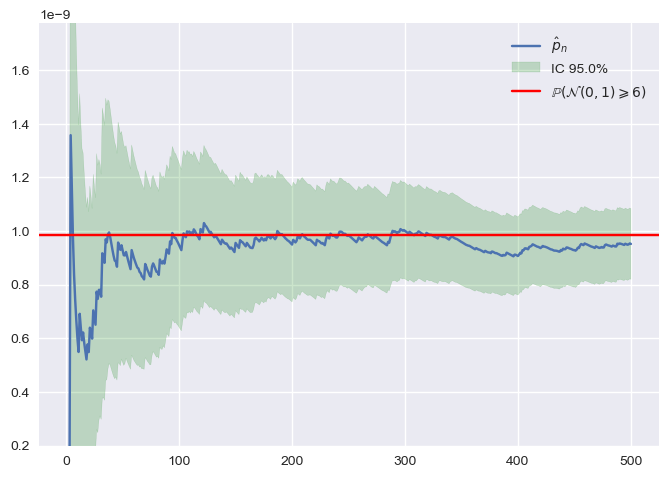

In [184]:
# Answer
exp = stats.expon(loc=threshold)
level = 0.05
n = 500

n_range=np.arange(1,501)
est = np.zeros(n)
ic_bound = np.zeros(n)
X = exp.rvs(random_state=rng, size=n)


for i in range(1,n+1):
    Xi = X[:i]
    est[i-1] = 1/i * np.sum(norm.pdf(Xi)/exp.pdf(Xi))
    ic_bound[i-1] = norm.ppf(1-level/2)*np.sqrt((np.sum((norm.pdf(Xi)/exp.pdf(Xi))**2)/i - est[i-1]**2)/i)
std_dev_exp = (np.sum((X >= 6).astype(float)*(norm.pdf(X)/exp.pdf(X))**2)/n - est[n-1]**2)


fig = plt.figure()
plt.plot(n_range, est, label="$\\hat{{p}}_n$")
plt.fill_between(n_range, est+ic_bound, est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(1 - norm.cdf(threshold), color='red', label=f"$\\mathbb{{P}}(\\mathcal{{N}}(0, 1) \\geqslant {threshold})$")
plt.ylim(.2*p, 1.8*p)
plt.legend();

Exemple :

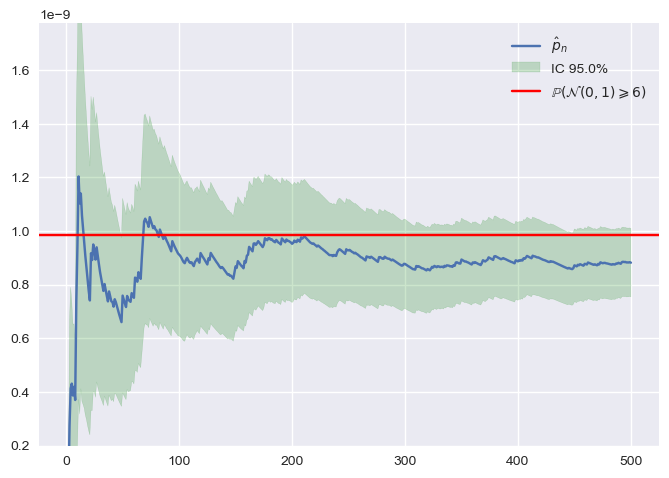

In [170]:
fig

>**Question 5.** Faire de même en considérant pour loi d'échantillonnage une loi gaussienne $Y\sim\mathcal{N}(6,1)$.

**Réponse :**
…

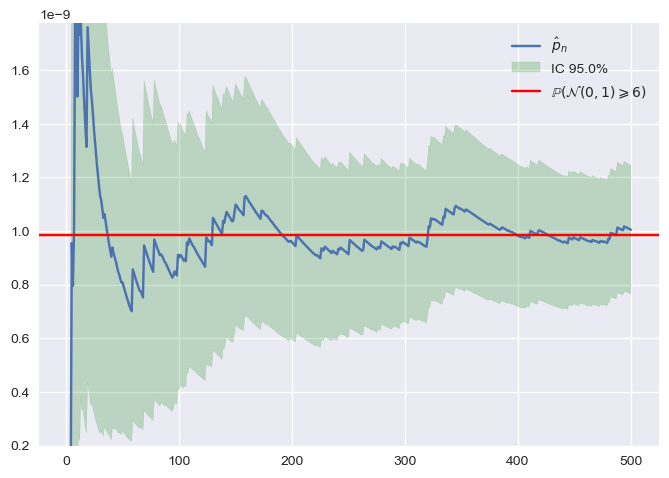

In [185]:
# Answer
norm6 = stats.norm(loc=6)
level = 0.05
n = 500

n_range=np.arange(1,501)
est = np.zeros(n)
ic_bound = np.zeros(n)
X = norm6.rvs(random_state=rng, size=n)


for i in range(1,n+1):
    Xi = X[:i]
    est[i-1] = 1/i * np.sum((Xi >= 6).astype(float) * norm.pdf(Xi)/norm6.pdf(Xi))
    ic_bound[i-1] = norm.ppf(1-level/2)*np.sqrt((np.sum((Xi >= 6).astype(float)*(norm.pdf(Xi)/norm6.pdf(Xi))**2)/i - est[i-1]**2)/i)
std_dev_norm6 = (np.sum((X >= 6).astype(float)*(norm.pdf(X)/norm6.pdf(X))**2)/n - est[n-1]**2)


fig = plt.figure()
plt.plot(n_range, est, label="$\\hat{{p}}_n$")
plt.fill_between(n_range, est+ic_bound, est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(1 - norm.cdf(threshold), color='red', label=f"$\\mathbb{{P}}(\\mathcal{{N}}(0, 1) \\geqslant {threshold})$")
plt.ylim(.2*p, 1.8*p)
plt.legend();

>**Question 6.** Des deux dernières méthodes, laquelle choisissez-vous ?

**Réponse :**
…

In [ ]:
# On choisit l'estimateur qui a le plus petit écart-type asymptotique, 
# qui correspond à la racine carrée de la variance asymptotique de l'estimateur.
# Donc, si on calcule les écarts-types asymptotiques de chacun, on a :

print(std_dev_exp)  # Écart-type pour l'échantillonnage préférentiel
print(std_dev_norm6)  # Écart-type pour le Monte Carlo standard

# L'écart-type de l'échantillonnage préférentiel est nettement plus petit,
# donc on va préférer la méthode qui utilise l'exponentielle.

2.2606467751097177e-18
7.454113127576948e-18


# Exercice 4 : Here comes trouble <a id="part4"></a>
>On veut retrouver par simulation la valeur de $p=\mathbb{P}(X\geq 10)$ avec $X$ qui suit une loi de Pareto de paramètres $(1,3)$, c'est-à-dire de densité $f(x)=3 x^{-4}\mathbf{1}_{x\geq 1}$.
>
>**Question 1.** Déterminer la valeur de $p$ par le calcul.

**Réponse :**
…

In [ ]:
#en intégrant la densité de 10 a inf, on trouve P(X <= 10). Alors on applique 1-P(X<=10) = 0.001

0.0010000000000000009


>**Question 2.** Proposer une méthode de simulation par inversion pour simuler suivant cette loi de Pareto.

**Réponse :**
…

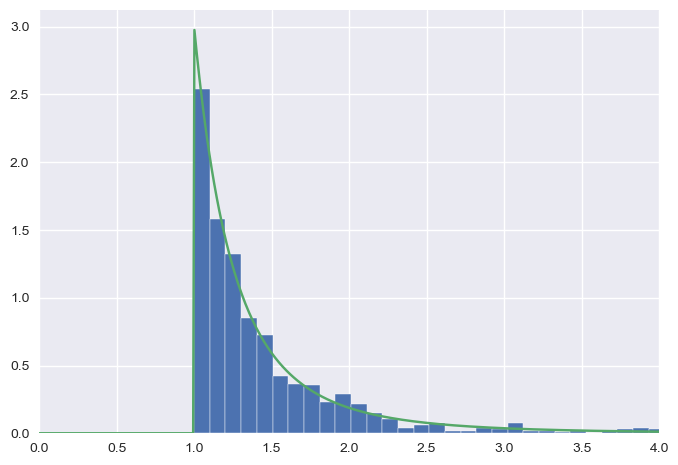

In [188]:
# Answer
#avec un calcul, on trouve que on peut simuler la loi pareto qu'on a comme 1/U^(1/3) avec U uniforme [0,1]

unif = stats.uniform()
pareto = stats.pareto(b=3)

n = 1000

x = 1/(unif.rvs(size=n, random_state=rng)**(1/3))

t = np.linspace(0, 4, num=500)
plt.hist(x, label='Échantillon', **nice_hist)
plt.plot(t, pareto.pdf(t), label='Densité')
plt.xlim((0, t.max()));

>**Question 3.** Illustrer la convergence de l'estimateur Monte-Carlo standard, ainsi que les intervalles de confiance asymptotiques à 95% (on pourra utiliser le simulateur de la question précédente ou `stats.pareto`).

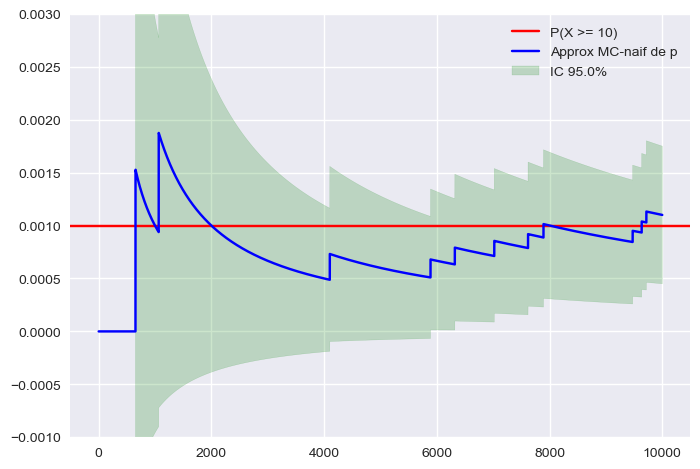

In [220]:
#on construit un MC-naif pour estimer p
n=10000
X = pareto.rvs(random_state=rng, size=n)
n_range = np.arange(1,n+1)
level = 0.05

est = np.cumsum((X>=10)) /n_range
ic_bound = norm.ppf(1-level/2)* np.sqrt((est * (1-est))/n_range)

fig, ax = plt.subplots()
ax.axhline(0.001, color='red', label=f"P(X >= 10)")
ax.plot(n_range, est, color='blue', label=f"Approx MC-naif de p")
ax.fill_between(n_range, est+ic_bound,est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.legend()
plt.ylim(-p, 3*p)
plt.show()


>**Question 4.** Utiliser une loi exponentielle translatée pour estimer $p$ par échantillonnage préférentiel, représenter la convergence, les intervalles de confiance, et expliquer ce qui se passe.

**Réponse :**
…

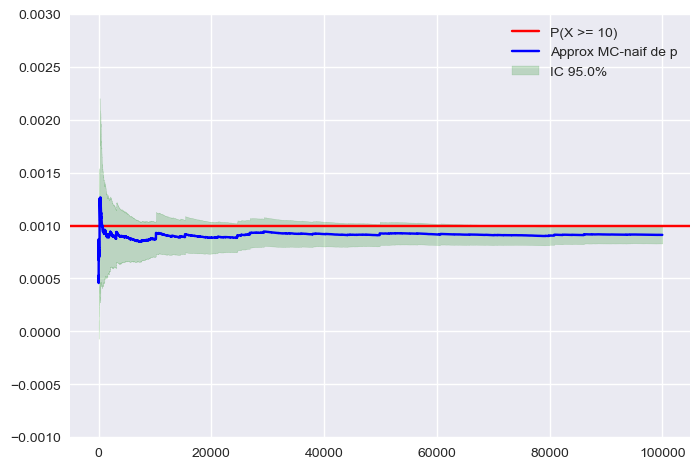

In [268]:
n = 100000
exp = stats.expon(loc=10)
X = exp.rvs(random_state=rng,size=n)
n_range = np.arange(1,n+1)

est = np.cumsum(pareto.pdf(X)/exp.pdf(X))/n_range
r = np.cumsum(((pareto.pdf(X)/exp.pdf(X))**2)/n_range) - est**2
ic_bound = norm.ppf(1-level/2) * np.sqrt(r/n_range)

fig, ax = plt.subplots()
ax.axhline(0.001, color='red', label=f"P(X >= 10)")
ax.plot(n_range, est, color='blue', label=f"Approx MC-naif de p")
ax.fill_between(n_range, est+ic_bound,est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.legend()
plt.ylim(-p, 3*p)
plt.show()

#Comme la loi exponentielle translatée a une queue plus légère que celle de Pareto,  
# le rapport f(x)/g(x) peut prendre des valeurs extrêmement grandes. Cela entraîne une variance 
# infinie de l'estimateur, ce qui explique l'instabilité que on peut observer si on fait quelques simulations.